In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#Importing the dataset to pandas
data=pd.read_csv('fer2018_data.csv')
print(data.head())

   emotion   p1   p2   p3   p4   p5   p6   p7   p8   p9  ...    p2295  p2296  \
0        0   70   80   82   72   58   58   60   63   54  ...      159    182   
1        0  151  150  147  155  148  133  111  140  170  ...      105    108   
2        2  231  212  156  164  174  138  161  173  182  ...      104    138   
3        4   24   32   36   30   32   23   19   20   30  ...      174    126   
4        6    4    0    0    0    0    0    0    0    0  ...       12     34   

   p2297  p2298  p2299  p2300  p2301  p2302  p2303  p2304  
0    183    136    106    116     95    106    109     82  
1     95    108    102     67    171    193    183    184  
2    152    122    114    101     97     88    110    152  
3    132    132    133    136    139    142    143    142  
4     31     31     31     27     31     30     29     30  

[5 rows x 2305 columns]


In [3]:
#Randomizing the dataset
np.random.seed(1)
shuffled_index=np.random.permutation(data.index)
final_data=data.loc[shuffled_index]
print(final_data.head())

       emotion   p1   p2   p3   p4   p5   p6   p7   p8   p9  ...    p2295  \
35624        0   70   80   82   72   58   58   60   63   54  ...      159   
12788        0  151  150  147  155  148  133  111  140  170  ...      105   
7821         2  231  212  156  164  174  138  161  173  182  ...      104   
31831        4   24   32   36   30   32   23   19   20   30  ...      174   
16799        6    4    0    0    0    0    0    0    0    0  ...       12   

       p2296  p2297  p2298  p2299  p2300  p2301  p2302  p2303  p2304  
35624    182    183    136    106    116     95    106    109     82  
12788    108     95    108    102     67    171    193    183    184  
7821     138    152    122    114    101     97     88    110    152  
31831    126    132    132    133    136    139    142    143    142  
16799     34     31     31     31     27     31     30     29     30  

[5 rows x 2305 columns]


In [4]:
#Feature extraction
normalized_pixels=final_data.loc[:,'p1':'p2304']/255
sorted_var=normalized_pixels.var().sort_values(ascending=False)
greater_var=sorted_var[sorted_var>0.06]
extracted_features=greater_var.index.tolist()
print(len(extracted_features))
print(final_data[extracted_features].head())

1041
        p1  p48  p49  p96  p97  p144   p2  p145  p192  p47  ...    p490  \
35624   70   41   65   44   50    47   80    38    45   43  ...     146   
12788  151  120  151  137  151   146  150   151   139  140  ...     140   
7821   231   16  229   27  214    28  212   202    23   27  ...     186   
31831   24  173   25  173   26   174   32    26   174  172  ...      38   
16799    4   25    1   26    0    26    0     0    28   24  ...      54   

       p2100  p712  p2289  p2273  p633  p254  p225  p395  p1016  
35624     76    53    173    125   132   170   200   153    177  
12788    132    73    133    112   156   158   140   125    135  
7821      98   196    130    122   190   188   228   184    228  
31831    164   188    114    169    20    22    71    33    154  
16799    158   169    155     55    30   108   190    81     98  

[5 rows x 1041 columns]


In [5]:
#Splitting final_data into train and test set
X=final_data.loc[:,'p1':'p2304']
y=final_data['emotion']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [6]:
print(X_train.shape)
print(X_test.shape)

(28709, 2304)
(7178, 2304)


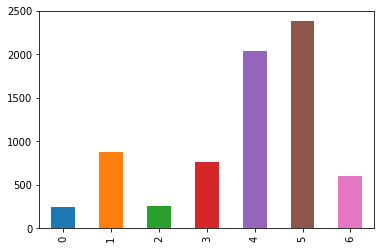

Overall Accuracy of the model:0.21607690164391194


In [21]:
#Running GaussianNB on full dataset
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

#Plotting emotion predicted with all features
predictions=nb.predict(X_test)
predictions=pd.DataFrame(predictions)
predictions[0].value_counts().sort_index().plot.bar()
plt.show()
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

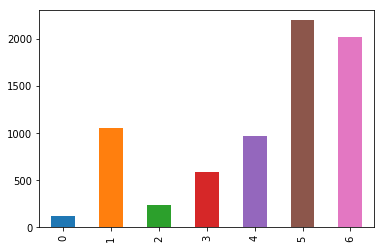

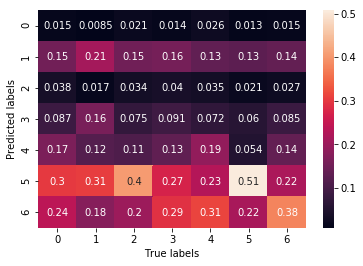

Overall Accuracy of the model:0.19127890777375314


In [63]:
#Running GaussianNB on dataset with extracted features
nb=GaussianNB()
nb.fit(X_train[extracted_features],y_train)

#Plotting emotion predicted with all features
predictions=nb.predict(X_test[extracted_features])
predictions=pd.DataFrame(predictions)
predictions[0].value_counts().sort_index().plot.bar()
plt.show()
#Plotting the confusion matrix
c_matrix=confusion_matrix(predictions,y_test)
ax=plt.subplot()
cm=pd.DataFrame(c_matrix)
    
#Finding the relative percent of actual vs prediction
row_sum=cm.sum(axis=0)
cm=cm.apply(lambda x:x/row_sum,axis=1)
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
plt.show()
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

In [15]:
print(nb.predict_proba(X_test)[0])

[2.00420299e-30 4.31802010e-25 1.00000000e+00 1.95441577e-71
 2.26666933e-84 1.95825989e-60 6.02430832e-79]


In [6]:
top_14=['p1362', 'p1314', 'p24', 'p25', 'p818', 'p770', 'p1897', 'p1896', 'p551', 'p599', 'p1408', 'p1456', 'p11', 'p12']
top_35=['p1362', 'p1314', 'p1363', 'p1409', 'p1315', 'p24', 'p25', 'p30', 'p26', 'p27', 'p818', 'p770', 'p866', 'p819', 'p867', 'p1897', 'p1896', 'p1849', 'p1945', 'p1944', 'p551', 'p599', 'p600', 'p648', 'p552', 'p1408', 'p1456', 'p1409', 'p840', 'p744', 'p11', 'p12', 'p53', 'p197', 'p89']
top_70=['p1362', 'p1314', 'p1363', 'p1409', 'p1315', 'p1410', 'p1361', 'p1423', 'p1375', 'p1457', 'p24', 'p25', 'p30', 'p26', 'p27', 'p29', 'p31', 'p19', 'p78', 'p79', 'p818', 'p770', 'p866', 'p819', 'p867', 'p911', 'p771', 'p863', 'p914', 'p623', 'p1897', 'p1896', 'p1849', 'p1945', 'p1944', 'p1850', 'p1898', 'p1848', 'p1993', 'p1992', 'p551', 'p599', 'p600', 'p648', 'p552', 'p647', 'p601', 'p649', 'p553', 'p550', 'p1408', 'p1456', 'p1409', 'p840', 'p744', 'p745', 'p792', 'p793', 'p1361', 'p1455', 'p11', 'p12', 'p53', 'p197', 'p89', 'p59', 'p150', 'p245', 'p137', 'p14']

top_35=list(set(top_35))
top_70=list(set(top_70))

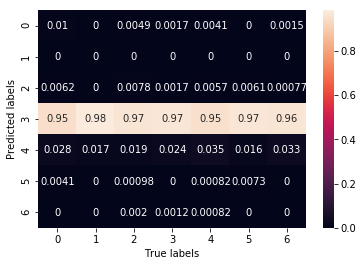

Overall Accuracy of the model:0.2429646140986347


In [69]:
nb.fit(X_train[top_14],y_train)
predictions=nb.predict(X_test[top_14])
#Plotting the confusion matrix
c_matrix=confusion_matrix(predictions,y_test)
ax=plt.subplot()
cm=pd.DataFrame(c_matrix)
    
#Finding the relative percent of actual vs prediction
row_sum=cm.sum(axis=0)
cm=cm.apply(lambda x:x/row_sum,axis=1)
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
plt.show()
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

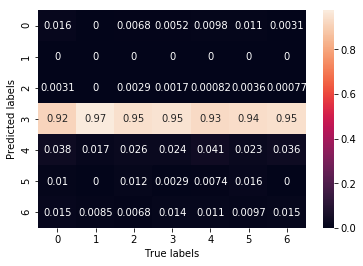

Overall Accuracy of the model:0.24310392867093897


In [70]:
nb.fit(X_train[top_35],y_train)
predictions=nb.predict(X_test[top_35])
#Plotting the confusion matrix
c_matrix=confusion_matrix(predictions,y_test)
ax=plt.subplot()
cm=pd.DataFrame(c_matrix)
    
#Finding the relative percent of actual vs prediction
row_sum=cm.sum(axis=0)
cm=cm.apply(lambda x:x/row_sum,axis=1)
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
plt.show()
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

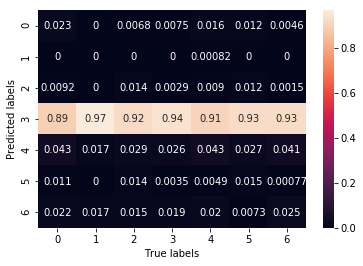

Overall Accuracy of the model:0.2449150181108944


In [71]:
nb.fit(X_train[top_70],y_train)
predictions=nb.predict(X_test[top_70])
#Plotting the confusion matrix
c_matrix=confusion_matrix(predictions,y_test)
ax=plt.subplot()
cm=pd.DataFrame(c_matrix)
    
#Finding the relative percent of actual vs prediction
row_sum=cm.sum(axis=0)
cm=cm.apply(lambda x:x/row_sum,axis=1)
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('True labels')
ax.set_ylabel('Predicted labels')
plt.show()
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

In [7]:

def find_clusters(n_num,features):
    kmeans=KMeans(n_clusters=n_num,random_state=1)
    #Calculated distance for all features
    clusters = kmeans.fit_predict(X_train[features])#Fit the training set without label column
    print(kmeans.cluster_centers_.shape)
    mapping={}
    labels = np.zeros_like(clusters)
    for i in range(n_num):
        mask = (clusters == i)
        labels[mask] = mode(y_train[mask])[0]
        mapping[i]=mode(y_train[mask])[0][0]
    print(accuracy_score(y_train, labels))
    cluster_test=kmeans.predict(X_test[features])
    y_predict=[mapping[c_test] for c_test in cluster_test ]
    print(accuracy_score(y_test, y_predict))
    print(mapping)
    


In [39]:
#Without tsne
from scipy.stats import mode
from sklearn.cluster import KMeans
import time
start=time.time()
find_clusters(1000,top_14)
end = time.time()
print(end - start)

(1000, 14)
0.34278449266780453
0.2850376149345222
{0: 0, 1: 3, 2: 2, 3: 6, 4: 6, 5: 4, 6: 2, 7: 6, 8: 3, 9: 4, 10: 3, 11: 3, 12: 4, 13: 2, 14: 6, 15: 3, 16: 4, 17: 2, 18: 6, 19: 3, 20: 6, 21: 3, 22: 0, 23: 3, 24: 3, 25: 4, 26: 3, 27: 3, 28: 6, 29: 0, 30: 5, 31: 0, 32: 3, 33: 4, 34: 4, 35: 3, 36: 5, 37: 3, 38: 3, 39: 2, 40: 4, 41: 3, 42: 6, 43: 3, 44: 6, 45: 4, 46: 4, 47: 4, 48: 5, 49: 3, 50: 3, 51: 3, 52: 0, 53: 3, 54: 3, 55: 3, 56: 3, 57: 6, 58: 3, 59: 6, 60: 0, 61: 4, 62: 3, 63: 6, 64: 3, 65: 4, 66: 6, 67: 2, 68: 5, 69: 3, 70: 3, 71: 5, 72: 3, 73: 4, 74: 6, 75: 0, 76: 6, 77: 6, 78: 4, 79: 4, 80: 4, 81: 3, 82: 3, 83: 4, 84: 4, 85: 4, 86: 3, 87: 4, 88: 3, 89: 4, 90: 6, 91: 3, 92: 0, 93: 3, 94: 4, 95: 4, 96: 3, 97: 5, 98: 3, 99: 4, 100: 0, 101: 3, 102: 5, 103: 3, 104: 3, 105: 3, 106: 3, 107: 2, 108: 3, 109: 6, 110: 3, 111: 2, 112: 6, 113: 3, 114: 4, 115: 0, 116: 3, 117: 3, 118: 3, 119: 0, 120: 3, 121: 3, 122: 5, 123: 3, 124: 2, 125: 6, 126: 3, 127: 5, 128: 4, 129: 3, 130: 5, 131: 5, 132

In [10]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# Project the data: this step will take several seconds
tsne = TSNE(n_components=3, init='random', random_state=0)
emotion_proj = tsne.fit_transform(X_train[top_14])


In [38]:
start=time.time()
kmeans = KMeans(n_clusters=1000, random_state=0)
clusters = kmeans.fit_predict(emotion_proj)
from scipy.stats import mode
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(1000):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

# Compute the accuracy
print(accuracy_score(y_train, labels))
end = time.time()
print(end - start)

0.3447351004911352
309.9723708629608


In [14]:
print(emotion_proj.shape)

(28709, 3)


In [41]:
y_train.shape


(28709,)

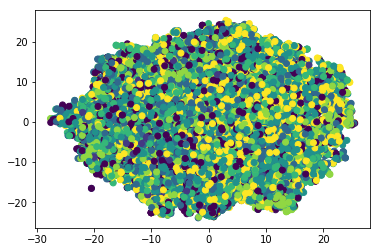

In [36]:
plt.scatter(emotion_proj[:,0],emotion_proj[:,2],c=y_train)